In [95]:
import pandas as pd
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from urllib.parse import urlparse
import re
from googlesearch import search
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score ,make_scorer, precision_score, recall_score, f1_score
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import classification_report , confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from keras.models import Sequential
from keras.layers import Activation, Dense
from sklearn.neural_network import MLPClassifier
from sklearn.utils import shuffle
from math import log
from re import compile
from urllib.parse import urlparse
from socket import gethostbyname
from requests import get
from json import dump
from string import ascii_lowercase
from numpy import array
import whois
from datetime import datetime, timezone
import math
import pandas as pd
from sklearn.model_selection import KFold
from pyquery import PyQuery
from requests import get
import urllib.parse as urlparse
from urllib.parse import urlparse,urlencode
import ipaddress
import re
from sklearn.model_selection import train_test_split
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.ensemble import BaggingClassifier,GradientBoostingClassifier,StackingClassifier,RandomForestClassifier,ExtraTreesClassifier,AdaBoostClassifier,VotingClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix, roc_curve,auc
import numpy as np
from sklearn.model_selection import cross_validate
from vecstack import stacking
from sklearn.tree import DecisionTreeClassifier
from tqdm import tqdm
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
import sklearn.metrics as metrics
import warnings
warnings.filterwarnings('ignore')

In [3]:
final_data=pd.read_csv("url_features.csv")

In [4]:
final_data

,id,url,typ,ip_address,count_dot,sign_at,google_search,num_director,num_embed_domain,num_digits,len_url,num_parameter,num_fragments,pref_suf
0,5535,http://10bestbingorooms.com,1,0,1,0,1,0,0,2,27,0,0,0
1,5704,http://10stepstostartingyouronlinebusiness.com,1,0,1,0,1,0,0,2,46,0,0,0
2,5705,http://10surdix.com,1,0,1,0,1,0,0,2,19,0,0,0
3,6123,http://116-region.ru/wp-includes/capitalone360...,1,0,1,0,1,4,0,18,80,0,0,1
4,6124,http://116-region.ru/wp-includes/capitalone360...,1,0,2,0,1,4,0,18,89,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57277,439417,http://drevalair.com/wp-includes/images,1,0,1,0,1,2,0,0,40,0,0,0
57278,439497,http://drewwestcott.com/zeta/DROPBOXSECURE/sj/...,1,0,2,0,1,5,0,0,63,0,0,0
57279,439531,http://dreyfusashby.com/docs/324/2011/it/,1,0,1,0,1,5,0,7,42,0,0,0
57280,439532,http://dreyfusashby.com/italy/,1,0,1,0,1,2,0,0,31,0,0,0


In [5]:
le = LabelEncoder()
final_data["target"] = le.fit_transform(final_data["typ"])
final_data["target"].value_counts()

0    31857
1    25425
Name: target, dtype: int64

In [6]:
final_data

,id,url,typ,ip_address,count_dot,sign_at,google_search,num_director,num_embed_domain,num_digits,len_url,num_parameter,num_fragments,pref_suf,target
0,5535,http://10bestbingorooms.com,1,0,1,0,1,0,0,2,27,0,0,0,1
1,5704,http://10stepstostartingyouronlinebusiness.com,1,0,1,0,1,0,0,2,46,0,0,0,1
2,5705,http://10surdix.com,1,0,1,0,1,0,0,2,19,0,0,0,1
3,6123,http://116-region.ru/wp-includes/capitalone360...,1,0,1,0,1,4,0,18,80,0,0,1,1
4,6124,http://116-region.ru/wp-includes/capitalone360...,1,0,2,0,1,4,0,18,89,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57277,439417,http://drevalair.com/wp-includes/images,1,0,1,0,1,2,0,0,40,0,0,0,1
57278,439497,http://drewwestcott.com/zeta/DROPBOXSECURE/sj/...,1,0,2,0,1,5,0,0,63,0,0,0,1
57279,439531,http://dreyfusashby.com/docs/324/2011/it/,1,0,1,0,1,5,0,7,42,0,0,0,1
57280,439532,http://dreyfusashby.com/italy/,1,0,1,0,1,2,0,0,31,0,0,0,1


In [7]:
X = final_data.drop(['url','typ','target'] , axis = 1)
y = final_data.target

In [8]:
X

,id,ip_address,count_dot,sign_at,google_search,num_director,num_embed_domain,num_digits,len_url,num_parameter,num_fragments,pref_suf
0,5535,0,1,0,1,0,0,2,27,0,0,0
1,5704,0,1,0,1,0,0,2,46,0,0,0
2,5705,0,1,0,1,0,0,2,19,0,0,0
3,6123,0,1,0,1,4,0,18,80,0,0,1
4,6124,0,2,0,1,4,0,18,89,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
57277,439417,0,1,0,1,2,0,0,40,0,0,0
57278,439497,0,2,0,1,5,0,0,63,0,0,0
57279,439531,0,1,0,1,5,0,7,42,0,0,0
57280,439532,0,1,0,1,2,0,0,31,0,0,0


In [17]:

X_train, X_test, y_train, y_test = train_test_split(X, y,  test_size=0.2,shuffle=True, random_state=0)


In [25]:
scoring = {'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score), 
           'f1_score' : make_scorer(f1_score)}

## Random Forest

In [90]:
rf = RandomForestClassifier(n_estimators=100,max_features='sqrt')
rf.fit(X_train,y_train)
y_pred_rf = rf.predict(X_test)

In [92]:
score_rf = cross_validate(estimator =rf, X = X_train, y = y_train, cv = 10,scoring=scoring)
sorted(score_rf.keys())

['fit_time', 'score_time', 'test_f1_score', 'test_precision', 'test_recall']

In [108]:
print(f"10-Folds F1-Score: Recall %0.3f (+/- %0.3f)" % (score_rf['test_recall'].mean(), score_rf['test_recall'].std() * 2),"\n")
print(f"10-Folds F1-Score: f1_score %0.3f (+/- %0.3f)" % (score_rf['test_f1_score'].mean(), score_rf['test_f1_score'].std() * 2),"\n")
print(classification_report(y_test, y_pred_rf))

10-Folds F1-Score: Recall 0.913 (+/- 0.013) 

10-Folds F1-Score: f1_score 0.924 (+/- 0.009) 

              precision    recall  f1-score   support

           0       0.94      0.95      0.94      6385
           1       0.93      0.92      0.93      5072

    accuracy                           0.94     11457
   macro avg       0.94      0.94      0.94     11457
weighted avg       0.94      0.94      0.94     11457



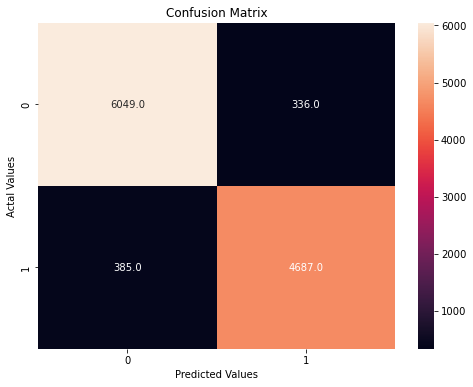

In [94]:
cm = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True,fmt=".1f")
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

## XGB_Classifier

In [107]:
xgb_c = xgb.XGBClassifier(n_estimators= 100)
xgb_c.fit(X_train,y_train)
y_pred_xgb_c = xgb_c.predict(X_test)
accuracy_score(y_test,y_pred_xgb_c)

0.9543510517587501

In [104]:
score_xgb_c = cross_validate(estimator =xgb_c, X = X_train, y = y_train, cv = 10,scoring=scoring)
sorted(score_xgb_c.keys())

['fit_time', 'score_time', 'test_f1_score', 'test_precision', 'test_recall']

In [105]:
print(f"10-Folds F1-Score: Recall %0.3f (+/- %0.3f)" % (score_xgb_c['test_recall'].mean(), score_xgb_c['test_recall'].std() * 2),"\n")
print(f"10-Folds F1-Score: f1_score %0.3f (+/- %0.3f)" % (score_xgb_c['test_f1_score'].mean(), score_xgb_c['test_f1_score'].std() * 2),"\n")
print(classification_report(y_test, y_pred_xgb_c))

10-Folds F1-Score: Recall 0.913 (+/- 0.012) 

10-Folds F1-Score: f1_score 0.943 (+/- 0.007) 

              precision    recall  f1-score   support

           0       0.94      0.98      0.96      6385
           1       0.97      0.92      0.95      5072

    accuracy                           0.95     11457
   macro avg       0.96      0.95      0.95     11457
weighted avg       0.96      0.95      0.95     11457



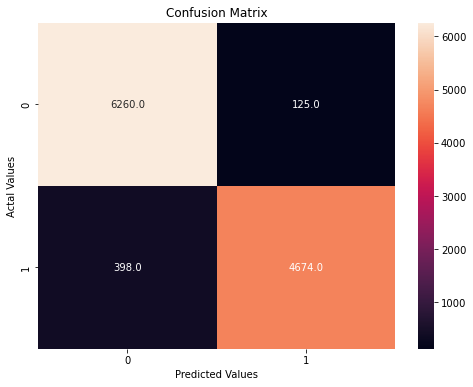

In [106]:
cm = confusion_matrix(y_test, y_pred_x)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True,fmt=".1f")
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

## Bagging

In [26]:
model_Bagging = BaggingClassifier()
model_Bagging.fit(X_train, y_train)
y_pred_Bagging = model_Bagging.predict(X_test)
accuracy_score(y_test, y_pred_Bagging)

0.9423932966745221

In [33]:
score_Bagging = cross_validate(estimator = model_Bagging, X = X_train, y = y_train, cv = 10,scoring=scoring)
sorted(score_Bagging.keys())


['fit_time', 'score_time', 'test_f1_score', 'test_precision', 'test_recall']

In [84]:
print(f"10-Folds F1-Score: Recall %0.3f (+/- %0.3f)" % (score_Bagging['test_recall'].mean(), score_Bagging['test_recall'].std() * 2),"\n")
print(f"10-Folds F1-Score: f1_score %0.3f (+/- %0.3f)" % (score_Bagging['test_f1_score'].mean(), score_Bagging['test_f1_score'].std() * 2),"\n")
print(classification_report(y_test, y_pred_Bagging))

10-Folds F1-Score: Recall 0.908 (+/- 0.011) 

10-Folds F1-Score: f1_score 0.930 (+/- 0.008) 

              precision    recall  f1-score   support

           0       0.94      0.96      0.95      6385
           1       0.95      0.92      0.93      5072

    accuracy                           0.94     11457
   macro avg       0.94      0.94      0.94     11457
weighted avg       0.94      0.94      0.94     11457



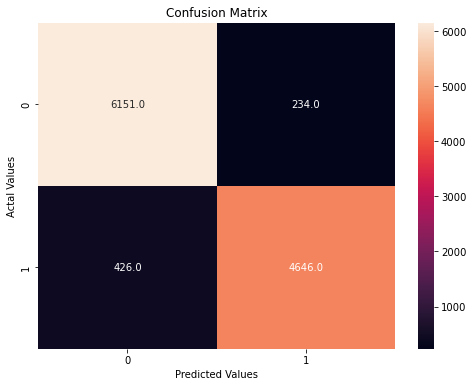

In [71]:
cm = confusion_matrix(y_test, y_pred_Bagging)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True,fmt=".1f")
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

## Boosting 

In [41]:
learning_rates = [0.05, 0.1, 0.25, 0.5, 0.75, 1]
for learning_rate in learning_rates:
    model_Boosting = GradientBoostingClassifier(n_estimators=100, learning_rate = learning_rate, max_features=2, max_depth = 2, random_state = 0)
    model_Boosting.fit(X_train, y_train)
    y_pred_Boosting = model_Boosting.predict(X_test)
    print("Learning rate: ", learning_rate)
    print("Accuracy score : {0:.3f}".format(accuracy_score(y_test, y_pred_Boosting)))
    print()


Learning rate:  0.05
Accuracy score : 0.909

Learning rate:  0.1
Accuracy score : 0.927

Learning rate:  0.25
Accuracy score : 0.931

Learning rate:  0.5
Accuracy score : 0.935

Learning rate:  0.75
Accuracy score : 0.938

Learning rate:  1
Accuracy score : 0.938



In [42]:
score_Boosting = cross_validate(estimator = model_Boosting, X = X_train, y = y_train, cv = 10,scoring=scoring)
sorted(score_Boosting.keys())

['fit_time', 'score_time', 'test_f1_score', 'test_precision', 'test_recall']

In [83]:
print(f"10-Folds F1-Score: Recall %0.3f (+/- %0.3f)" % (score_Boosting['test_recall'].mean(), score_Boosting['test_recall'].std() * 2),"\n")
print(f"10-Folds F1-Score: f1_score %0.3f (+/- %0.3f)" % (score_Boosting['test_f1_score'].mean(), score_Boosting['test_f1_score'].std() * 2),"\n")
print(classification_report(y_test, y_pred_Boosting))

10-Folds F1-Score: Recall 0.877 (+/- 0.015) 

10-Folds F1-Score: f1_score 0.922 (+/- 0.009) 

              precision    recall  f1-score   support

           0       0.92      0.98      0.95      6385
           1       0.97      0.89      0.93      5072

    accuracy                           0.94     11457
   macro avg       0.94      0.93      0.94     11457
weighted avg       0.94      0.94      0.94     11457



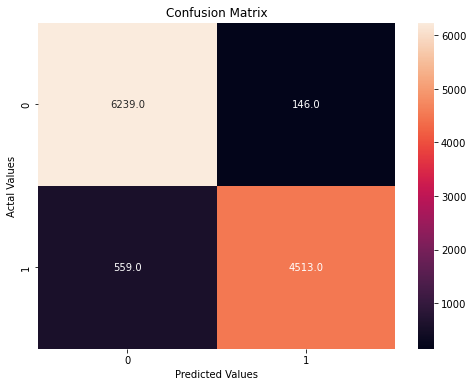

In [44]:
cm = confusion_matrix(y_test, y_pred_Boosting)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True,fmt=".1f")
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

## Ensamble between Bagging&Boosting using Stacking

In [46]:
All_Models = [
('RF', RandomForestClassifier(n_estimators=100, random_state=42)),
('SVM', make_pipeline(StandardScaler(),LinearSVC(random_state=42))),
('GNB', ExtraTreesClassifier()),
('Bagging',BaggingClassifier()),   
('Boosting',GradientBoostingClassifier(n_estimators=100, learning_rate = 1, max_features=2, max_depth = 2, random_state = 0))    
]

In [49]:
clf1=VotingClassifier(estimators=All_Models)
clf1.fit(X_train,y_train)

VotingClassifier(estimators=[('RF', RandomForestClassifier(random_state=42)),
                             ('SVM',
                              Pipeline(steps=[('standardscaler',
                                               StandardScaler()),
                                              ('linearsvc',
                                               LinearSVC(random_state=42))])),
                             ('GNB', ExtraTreesClassifier()),
                             ('Bagging', BaggingClassifier()),
                             ('Boosting',
                              GradientBoostingClassifier(learning_rate=1,
                                                         max_depth=2,
                                                         max_features=2,
                                                         random_state=0))])

In [50]:
y_pred_clf1=clf1.predict(X_test)
accuracy_score(y_test,y_pred_clf1)

0.9467574408658462

In [52]:
score_clf1 = cross_validate(estimator = clf1, X = X_train, y = y_train, cv = 10,scoring=scoring)
sorted(score_clf1.keys())


['fit_time', 'score_time', 'test_f1_score', 'test_precision', 'test_recall']

In [85]:
print(f"10-Folds F1-Score: Recall %0.3f (+/- %0.3f)" % (score_clf1['test_recall'].mean(), score_clf1['test_recall'].std() * 2),"\n")
print(f"10-Folds F1-Score: f1_score %0.3f (+/- %0.3f)" % (score_clf1['test_f1_score'].mean(), score_clf1['test_f1_score'].std() * 2),"\n")
print(classification_report(y_test, y_pred_clf1))


10-Folds F1-Score: Recall 0.902 (+/- 0.013) 

10-Folds F1-Score: f1_score 0.932 (+/- 0.007) 

              precision    recall  f1-score   support

           0       0.94      0.97      0.95      6385
           1       0.96      0.92      0.94      5072

    accuracy                           0.95     11457
   macro avg       0.95      0.94      0.95     11457
weighted avg       0.95      0.95      0.95     11457



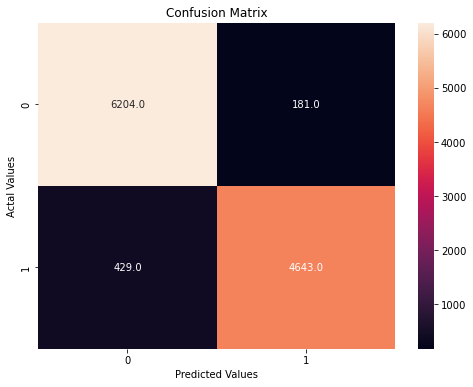

In [55]:
cm1 = confusion_matrix(y_test, y_pred_clf1)
plt.figure(figsize=(8,6))
sns.heatmap(cm1, annot=True,fmt=".1f")
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

In [56]:
clf2 = StackingClassifier(estimators=All_Models, final_estimator=LogisticRegression())
clf2.fit(X_train, y_train)

StackingClassifier(estimators=[('RF', RandomForestClassifier(random_state=42)),
                               ('SVM',
                                Pipeline(steps=[('standardscaler',
                                                 StandardScaler()),
                                                ('linearsvc',
                                                 LinearSVC(random_state=42))])),
                               ('GNB', ExtraTreesClassifier()),
                               ('Bagging', BaggingClassifier()),
                               ('Boosting',
                                GradientBoostingClassifier(learning_rate=1,
                                                           max_depth=2,
                                                           max_features=2,
                                                           random_state=0))],
                   final_estimator=LogisticRegression())

In [57]:
y_pred_clf2=clf2.predict(X_test)
accuracy_score(y_test, y_pred_clf2)

0.9482412498908964

In [59]:
score_clf2 = cross_validate(estimator = clf2, X = X_train, y = y_train, cv = 10,scoring=scoring)
sorted(score_clf2.keys())


['fit_time', 'score_time', 'test_f1_score', 'test_precision', 'test_recall']

In [87]:
print(f"10-Folds F1-Score: Recall %0.3f (+/- %0.3f)" % (score_clf2['test_recall'].mean(), score_clf2['test_recall'].std() * 2),"\n")
print(f"10-Folds F1-Score: f1_score %0.3f (+/- %0.3f)" % (score_clf2['test_f1_score'].mean(), score_clf2['test_f1_score'].std() * 2),"\n")
print(classification_report(y_test, y_pred_clf2))

10-Folds F1-Score: Recall 0.911 (+/- 0.012) 

10-Folds F1-Score: f1_score 0.935 (+/- 0.008) 

              precision    recall  f1-score   support

           0       0.94      0.97      0.95      6385
           1       0.96      0.92      0.94      5072

    accuracy                           0.95     11457
   macro avg       0.95      0.95      0.95     11457
weighted avg       0.95      0.95      0.95     11457



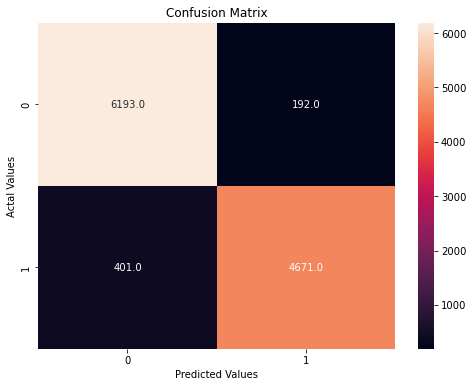

In [61]:
cm = confusion_matrix(y_test, y_pred_clf2)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True,fmt=".1f")
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

## KNN

In [62]:
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

In [63]:
y_pred_knn

array([0, 1, 0, ..., 1, 1, 1], dtype=int64)

In [64]:
accuracy_score(y_test,y_pred_knn)

0.9512961508248232

In [65]:
print('Training set score: {:.4f}'.format(knn.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(knn.score(X_test, y_test)))

Training set score: 0.9686
Test set score: 0.9513


In [66]:
score_knn = cross_validate(estimator =knn, X = X_train, y = y_train, cv = 10,scoring=scoring)
sorted(score_knn.keys())


['fit_time', 'score_time', 'test_f1_score', 'test_precision', 'test_recall']

In [89]:
print(f"10-Folds F1-Score: Recall %0.3f (+/- %0.3f)" % (score_knn['test_recall'].mean(), score_knn['test_recall'].std() * 2),"\n")
print(f"10-Folds F1-Score: f1_score %0.3f (+/- %0.3f)" % (score_knn['test_f1_score'].mean(), score_knn['test_f1_score'].std() * 2),"\n")
print(classification_report(y_test, y_pred_knn))

10-Folds F1-Score: Recall 0.894 (+/- 0.010) 

10-Folds F1-Score: f1_score 0.935 (+/- 0.006) 

              precision    recall  f1-score   support

           0       0.93      0.99      0.96      6385
           1       0.98      0.91      0.94      5072

    accuracy                           0.95     11457
   macro avg       0.96      0.95      0.95     11457
weighted avg       0.95      0.95      0.95     11457



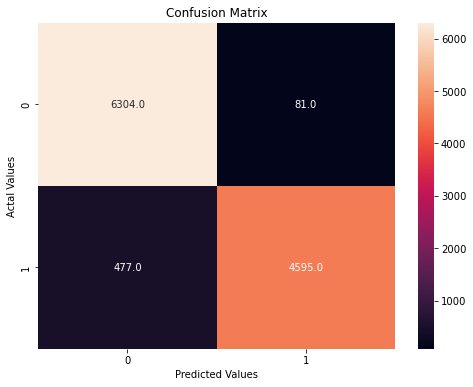

In [68]:
cm = confusion_matrix(y_test, y_pred_knn)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True,fmt=".1f")
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()